목적 : 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [114]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations

환경설정

In [115]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [116]:
df1 = pd.read_csv("./상장후보피처+시장지표.csv", encoding='utf-8', index_col=0).dropna()

Data set

In [117]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
(주)CMG제약,58820,2022,19,79,2,6,617,520,15,12,...,23.000,-716.667,1614.563,60479.048,3632.941,0.000,0,0,1,0
(주)ES큐브,50120,2020,3,270,3,24,62,60,929,754,...,22.000,-0.202,1089.064,-2022.628,938.209,1.000,0,0,0,1
(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,200,...,28.000,8.717,588.595,3407.741,507.129,0.000,0,1,0,0
(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,87,...,15.000,21.077,838.689,-4138.892,490.136,1.000,1,0,0,0
(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,9,...,10.000,-9.794,696.142,-5781.497,1088.800,0.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,239,...,11.000,-10.445,1047753.961,18230918.925,268881.490,1.000,0,0,1,0
도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,148,...,8.000,-1.147,796145.536,-5380708.257,342291.871,1.000,0,0,0,1
에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,77,...,9.000,7.601,2047153.005,16297442.427,885738.679,1.000,0,0,1,0


In [118]:
df1.isna().sum().sort_values(ascending=False)

거래소코드                0
총자본회전률               0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
비유동자산회전률             0
회계년도                 0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
부실판단                 0
도입기                  0
성숙기                  0
성장기                  0
유형자산증가율              0
매출액증가율               0
비유동자산증가율             0
유동자산증가율              0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률   

In [119]:
df1 = df1.rename(columns={'설립일': '영업년수',
                           '상장일': '상장년수'
                           })

df1['영업년수'] = pd.to_datetime(df1['영업년수'])
df1['영업년수'] = df1['영업년수'].dt.year
df1['영업년수'] = 2024 - df1['영업년수']

df1['상장년수'] = pd.to_datetime(df1['상장년수'])
df1['상장년수'] = df1['상장년수'].dt.year
df1['상장년수'] = 2024 - df1['상장년수']

In [120]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [121]:
df1.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,...,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,136485.349,2019.681,8.167,1272.220,-0.018,-2.743,299.781,248.044,122.133,95.819,...,54.000,-12.492,828706.580,-59581.392,421888.643,0.503,0.283,0.304,0.215,0.198
std,125026.425,3.012,51.058,23030.585,13.794,41.623,383.778,356.115,368.257,332.637,...,0.000,1004.117,19538609.316,6186722.582,9127352.329,0.500,0.451,0.460,0.411,0.399
min,40.000,2014.000,-606.000,-5211.000,-255.000,-620.000,4.000,3.000,0.000,0.000,...,54.000,-18475.906,-41590963.719,-48253995.691,0.000,0.000,0.000,0.000,0.000,0.000
25%,49495.000,2017.000,-10.000,-14.000,-4.000,-7.000,103.000,70.000,31.500,20.500,...,54.000,-10.569,921.397,-19862.022,755.621,0.000,0.000,0.000,0.000,0.000
50%,100660.000,2022.000,2.000,2.000,1.000,2.000,167.000,124.000,69.000,48.000,...,54.000,-1.046,1507.177,3458.297,1524.945,1.000,0.000,0.000,0.000,0.000
75%,214220.000,2022.000,18.000,37.000,6.000,10.000,327.500,261.000,129.000,99.500,...,54.000,16.487,2844.279,15128.207,3104.285,1.000,1.000,1.000,0.000,0.000
max,900340.000,2022.000,259.000,611057.000,44.000,90.000,3542.000,3246.000,9039.000,8254.000,...,54.000,8800.000,524652402.569,119828057.745,246199224.745,1.000,1.000,1.000,1.000,1.000


In [122]:
df1.isin([0]).sum().sort_values(ascending=False)

쇠퇴기                  586
성장기                  574
도입기                  524
성숙기                  509
부실판단                 363
총자본회전률               267
경영자본회전률              178
자본분배율                109
이윤분배율                107
비유동자산회전률              71
유동자산회전률               68
당좌자산회전률               53
차입금의존도                48
CASH FLOW 대 총자본비율     28
CASH FLOW 대 차입금비율     22
유형자산회전율               20
비유동자산증가율              18
총자본증가율                17
유형자산증가율               17
유동자산증가율               17
매출액증가율                17
CASH FLOW 대 매출액비율     12
현금비율                  11
CASH FLOW 대 부채비율       8
PER                    6
PCR                    6
유동부채비율                 6
순운전자본비율                6
PSR                    6
PBR                    6
부채비율                   5
자기자본순이익률               4
자기자본구성비율               4
총자본투자효율                4
CROE                   3
부가가치율                  3
매출채권회전률                2
설비투자효율                 1
총자산회전율                 1
총자본정상영업이익률             1


윈저라이징

In [123]:
import pandas as pd
import numpy as np

def adj_outlier(df, target=0.01, winsorizing=True):
    """
    데이터프레임에서 이상치를 조정합니다.

    매개변수:
    - dataframe: pandas DataFrame
    - 목표값: float, 이상치 식별을 위한 임계값
    - 윈저라이징: bool, 윈저라이징 기법을 적용할지 여부

    반환값:
    - 이상치가 조정된 pandas DataFrame
    """
    # 원본 DataFrame을 직접 수정하지 않기 위해 복사합니다.
    df_copy = df.copy()

    # 목표값에 기반하여 이상치를 식별합니다.    
    lower_bound = df_copy.quantile(target)
    upper_bound = df_copy.quantile(1 - target)

    # 윈저라이징이 지정된 경우 해당 열에 대해 이상치를 조정합니다.
    if winsorizing:
        df_copy = df_copy.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

    return df_copy

# 예제 사용법:
# '당신의_데이터프레임'이 실제 데이터프레임인 경우
# 조정된_데이터프레임 = 이상치_조정(당신의_데이터프레임)

In [142]:
import numpy as np

def winsorize(data, lower_percentile=5, upper_percentile=95):
    """
    이상치를 Winsorizing하여 데이터를 변형하는 함수
    
    Parameters:
    - data: 변형하려는 데이터 배열
    - lower_percentile: 이상치를 대체할 하한 백분위수
    - upper_percentile: 이상치를 대체할 상한 백분위수
    
    Returns:
    - winsorized_data: Winsorizing이 적용된 데이터 배열
    """
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    
    # 하한 이상치 대체
    data[data < lower_limit] = lower_limit
    
    # 상한 이상치 대체
    data[data > upper_limit] = upper_limit
    
    return data

outlier drop

In [124]:
# import pandas as pd
# import numpy as np

# def remove_rows_with_outliers(df, columns, threshold=1.5):
#     """
#     DataFrame에서 이상치가 포함된 행을 제거하는 함수

#     Parameters:
#     - df: 이상치를 제거할 DataFrame
#     - columns: 이상치를 검사할 열의 리스트
#     - threshold: 이상치를 정의하는 IQR의 배수, 기본값은 1.5

#     Returns:
#     - 이상치가 제거된 DataFrame
#     """
#     # 이상치 여부를 확인하는 함수
#     def has_outliers(row):
#         for column in columns:
#             sorted_data = np.sort(df[column])
#             q1, q3 = np.percentile(sorted_data, [25, 75])
#             iqr = q3 - q1
#             lower_bound = q1 - threshold * iqr
#             upper_bound = q3 + threshold * iqr

#             if not (lower_bound <= row[column] <= upper_bound):
#                 return True  # 이상치가 포함된 행

#         return False  # 이상치가 없는 행

#     # DataFrame에서 이상치가 포함된 행을 제거
#     filtered_df = df[df.apply(lambda row: not has_outliers(row), axis=1)]

#     return filtered_df

In [125]:
# filtered_df = remove_rows_with_outliers(df1, df1.columns)

In [126]:
# len(filtered_df)

In [127]:
# len(df1)

표준편자 outlier 제거

In [128]:
# import pandas as pd
# import numpy as np

# def remove_outliers_std(df, columns, threshold=3):
#     """
#     DataFrame에서 표준편차를 사용하여 이상치를 제거하는 함수

#     Parameters:
#     - df: 이상치를 제거할 DataFrame
#     - columns: 이상치를 검사할 열의 리스트
#     - threshold: 이상치를 정의하는 표준편차의 배수, 기본값은 3

#     Returns:
#     - 이상치가 제거된 DataFrame
#     """
#     # 이상치 여부를 확인하는 함수
#     def has_outliers(row):
#         for column in columns:
#             mean_val = df[column].mean()
#             std_val = df[column].std()

#             lower_bound = mean_val - threshold * std_val
#             upper_bound = mean_val + threshold * std_val

#             if not (lower_bound <= row[column] <= upper_bound):
#                 return True  # 이상치가 포함된 행

#         return False  # 이상치가 없는 행

#     # DataFrame에서 이상치가 포함된 행을 제거
#     filtered_df = df[df.apply(lambda row: not has_outliers(row), axis=1)]

#     return filtered_df

In [129]:
# filtered_df = remove_outliers_std(df1, df1.columns)

In [130]:
# len(filtered_df)

In [131]:
# len(df1)

범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [132]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [133]:
# 비상장 all data는 df1
# 비상장 label들

labels = df1[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 비상장 피처
features = df1.drop(
    labels=[
        '거래소코드',
        '회계년도',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ],
    axis=1,    
)

# 현금흐름 4개
cash_ft1 = df1[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 안정성 10개
stability_ft1 = df1[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 수익성 10개
profitability_ft1 = df1[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본정상영업이익률',
        '매출액정상영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 성장성 8개
growth_ft1 = df1[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 생산성 5개
productivity_ft1 = df1[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 활동성 10개
activity_ft1 = df1[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 시장지표 및 기타
etc_ft1 = df1[
    [
        '영업년수',
        '상장년수',
        'PER',
        'PBR',
        'PCR',
        'PSR',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

In [134]:
df1_ft = [cash_ft1, stability_ft1, profitability_ft1, growth_ft1, productivity_ft1, activity_ft1]

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, (주)CMG제약 to 태양기계(주)
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   거래소코드              731 non-null    int64  
 1   회계년도               731 non-null    int64  
 2   CASH FLOW 대 부채비율   731 non-null    int64  
 3   CASH FLOW 대 차입금비율  731 non-null    int64  
 4   CASH FLOW 대 총자본비율  731 non-null    int64  
 5   CASH FLOW 대 매출액비율  731 non-null    int64  
 6   유동비율               731 non-null    int64  
 7   당좌비율               731 non-null    int64  
 8   부채비율               731 non-null    int64  
 9   유동부채비율             731 non-null    int64  
 10  차입금의존도             731 non-null    int64  
 11  순운전자본비율            731 non-null    int64  
 12  현금비율               731 non-null    int64  
 13  유동자산구성비율           731 non-null    int64  
 14  자기자본구성비율           731 non-null    int64  
 15  자기자본순이익률           731 non-null    float64
 16  경영자본순이익률           7

In [136]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
(주)CMG제약,58820,2022,19,79,2,6,617,520,15,12,...,54,-716.667,1614.563,60479.048,3632.941,0.000,0,0,1,0
(주)ES큐브,50120,2020,3,270,3,24,62,60,929,754,...,54,-0.202,1089.064,-2022.628,938.209,1.000,0,0,0,1
(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,200,...,54,8.717,588.595,3407.741,507.129,0.000,0,1,0,0
(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,87,...,54,21.077,838.689,-4138.892,490.136,1.000,1,0,0,0
(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,9,...,54,-9.794,696.142,-5781.497,1088.800,0.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,239,...,54,-10.445,1047753.961,18230918.925,268881.490,1.000,0,0,1,0
도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,148,...,54,-1.147,796145.536,-5380708.257,342291.871,1.000,0,0,0,1
에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,77,...,54,7.601,2047153.005,16297442.427,885738.679,1.000,0,0,1,0


In [137]:
# def qq_plot(df):
#     # 모든 칼럼 순회
#     for col in df.columns:
#         # Q-Q plot 그리기
#         stats.probplot(df[col], dist="norm", plot=plt)
#         plt.title(f"Q-Q plot for {col}")
#         plt.show()


# Q-Qplot

In [138]:
def qq_plot(df):
    fig, axes = plt.subplots(13, 5, figsize=(15, 30))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(13):
        for j in range(5):
            col_index = i * 5 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

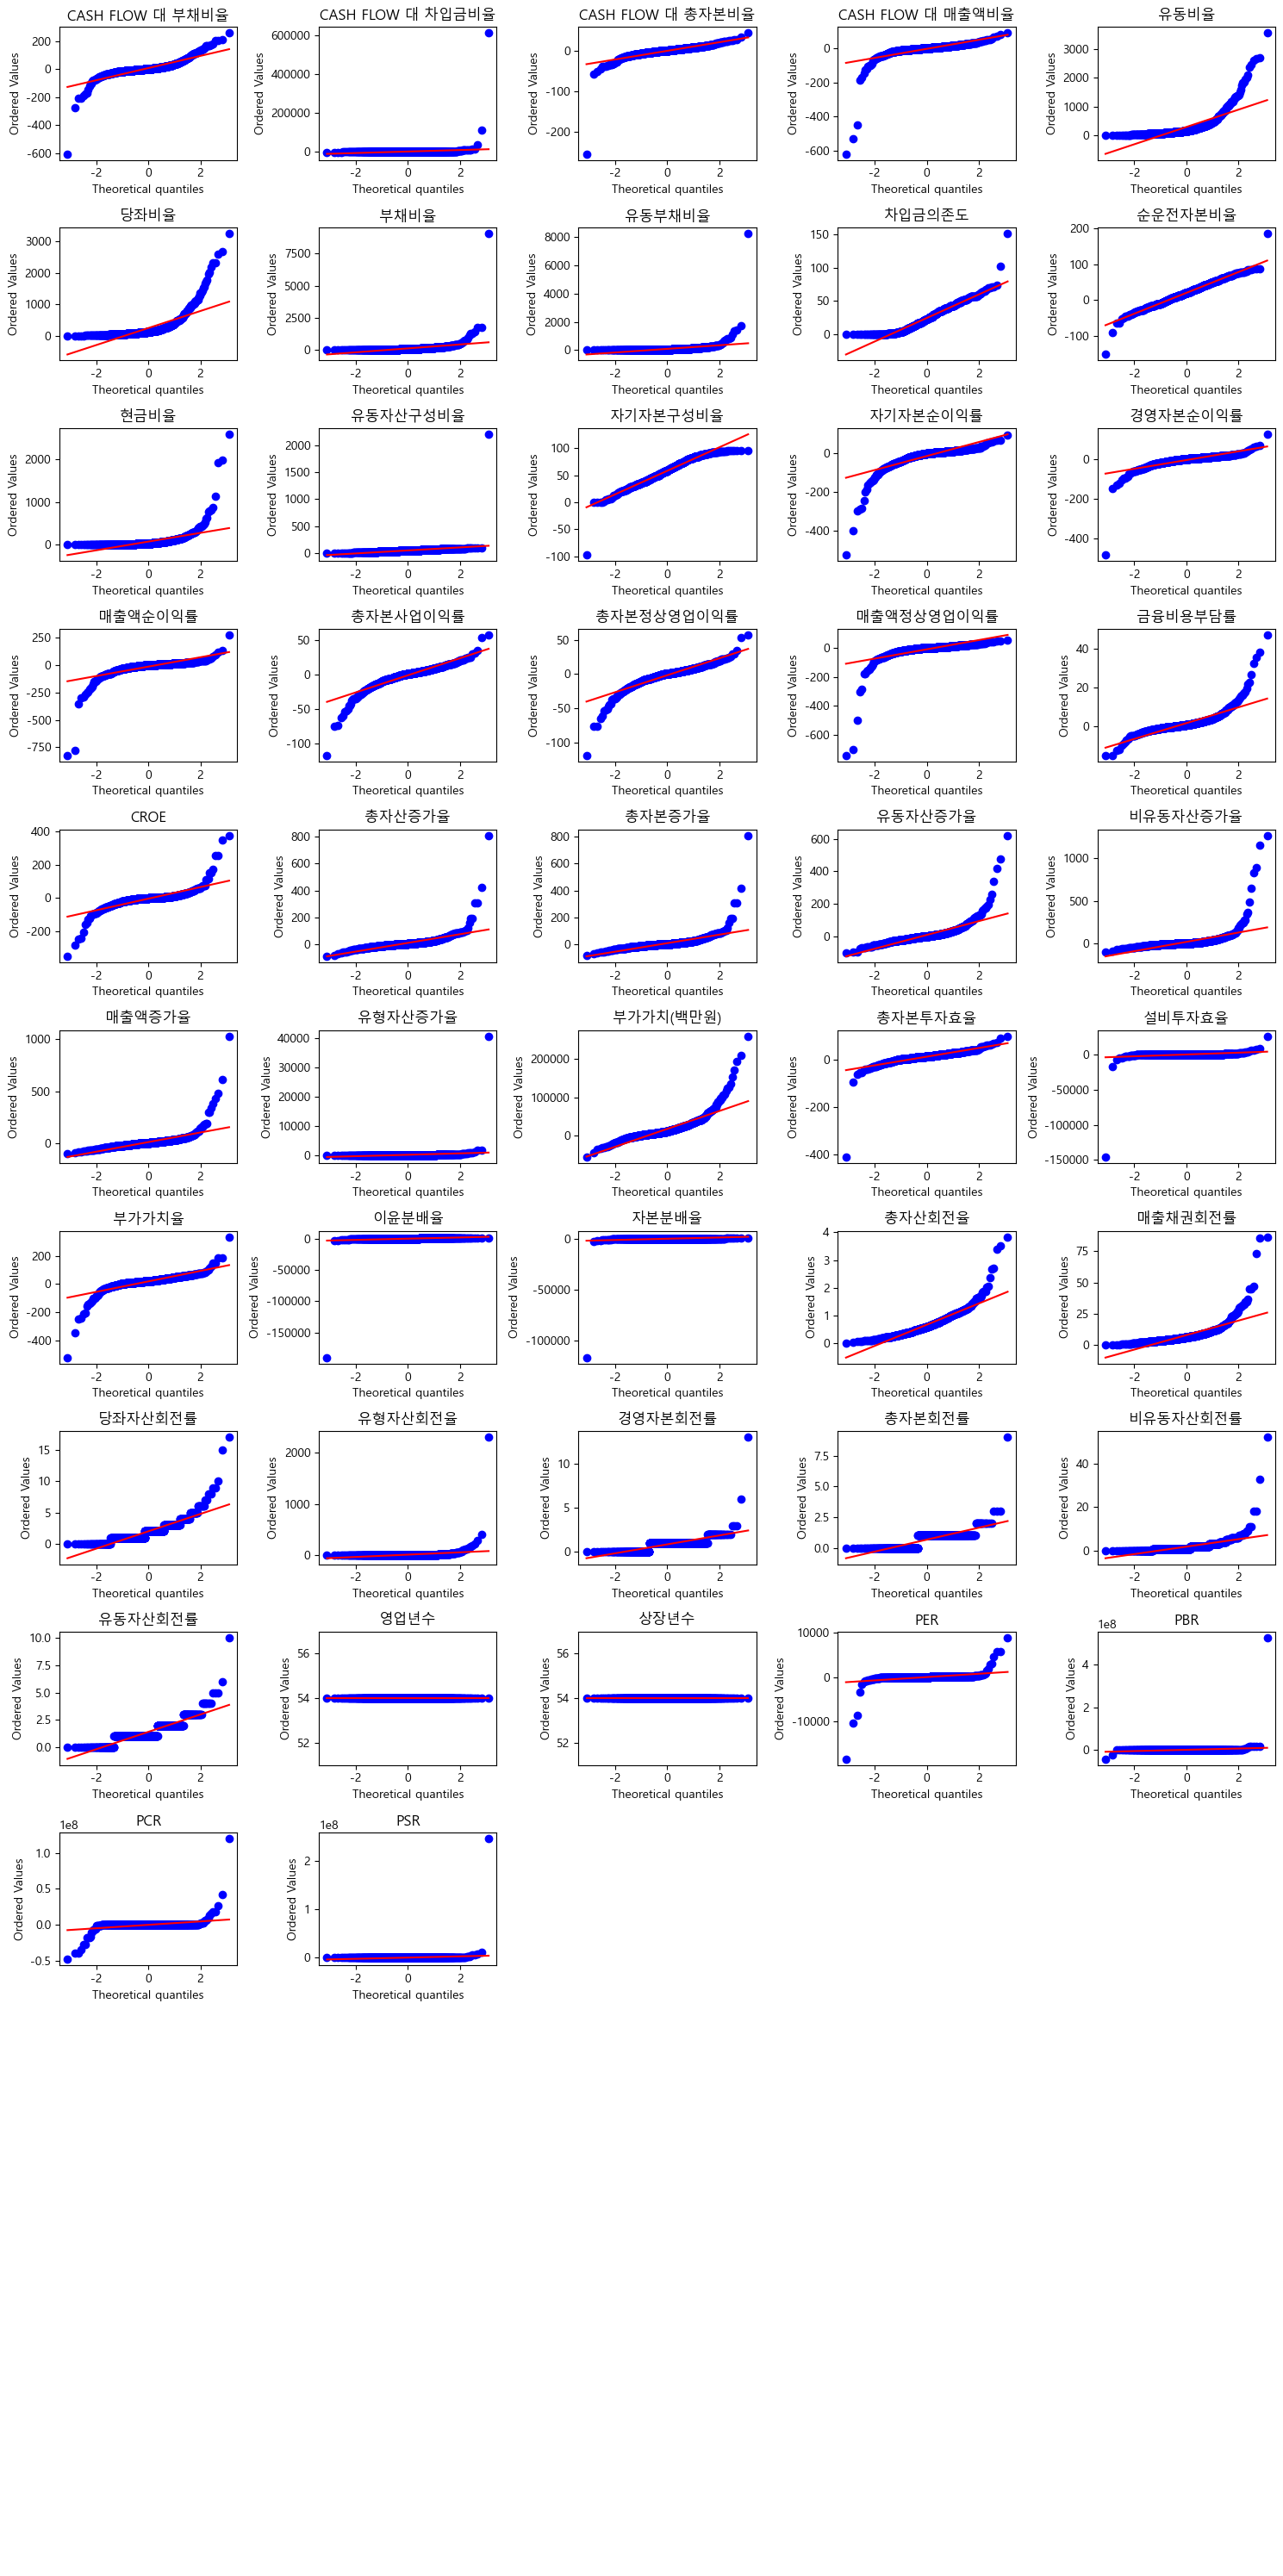

In [139]:
qq_plot(features)

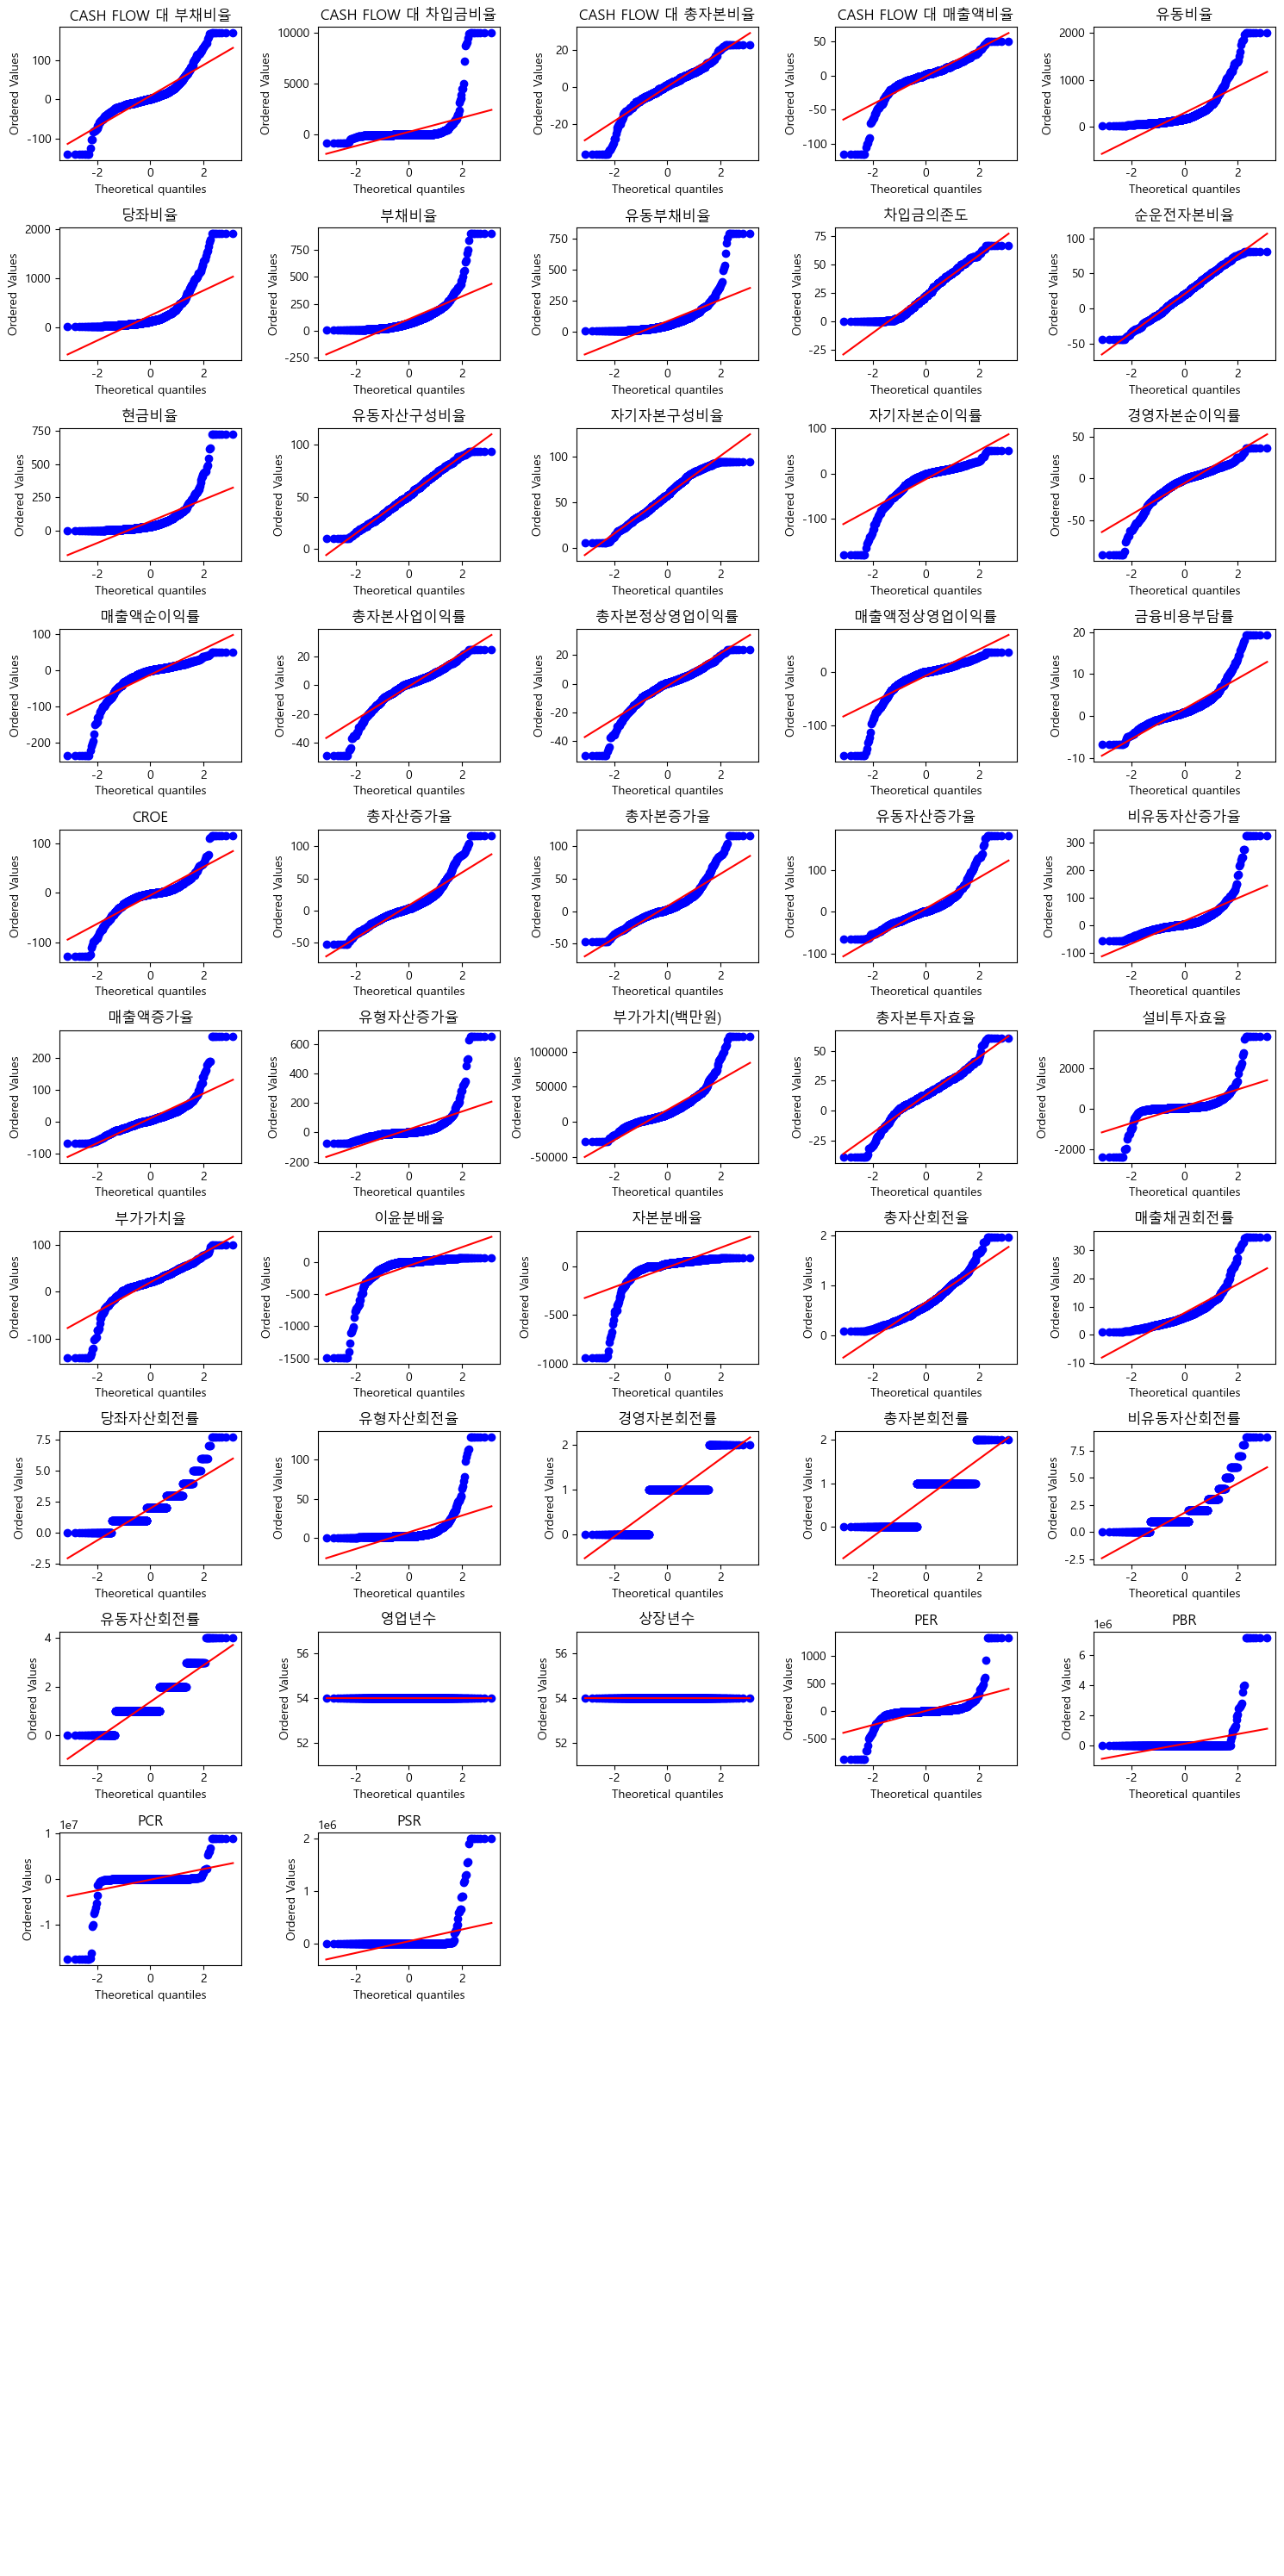

In [140]:
qq_plot(adj_outlier(features, target=0.01, winsorizing=True))

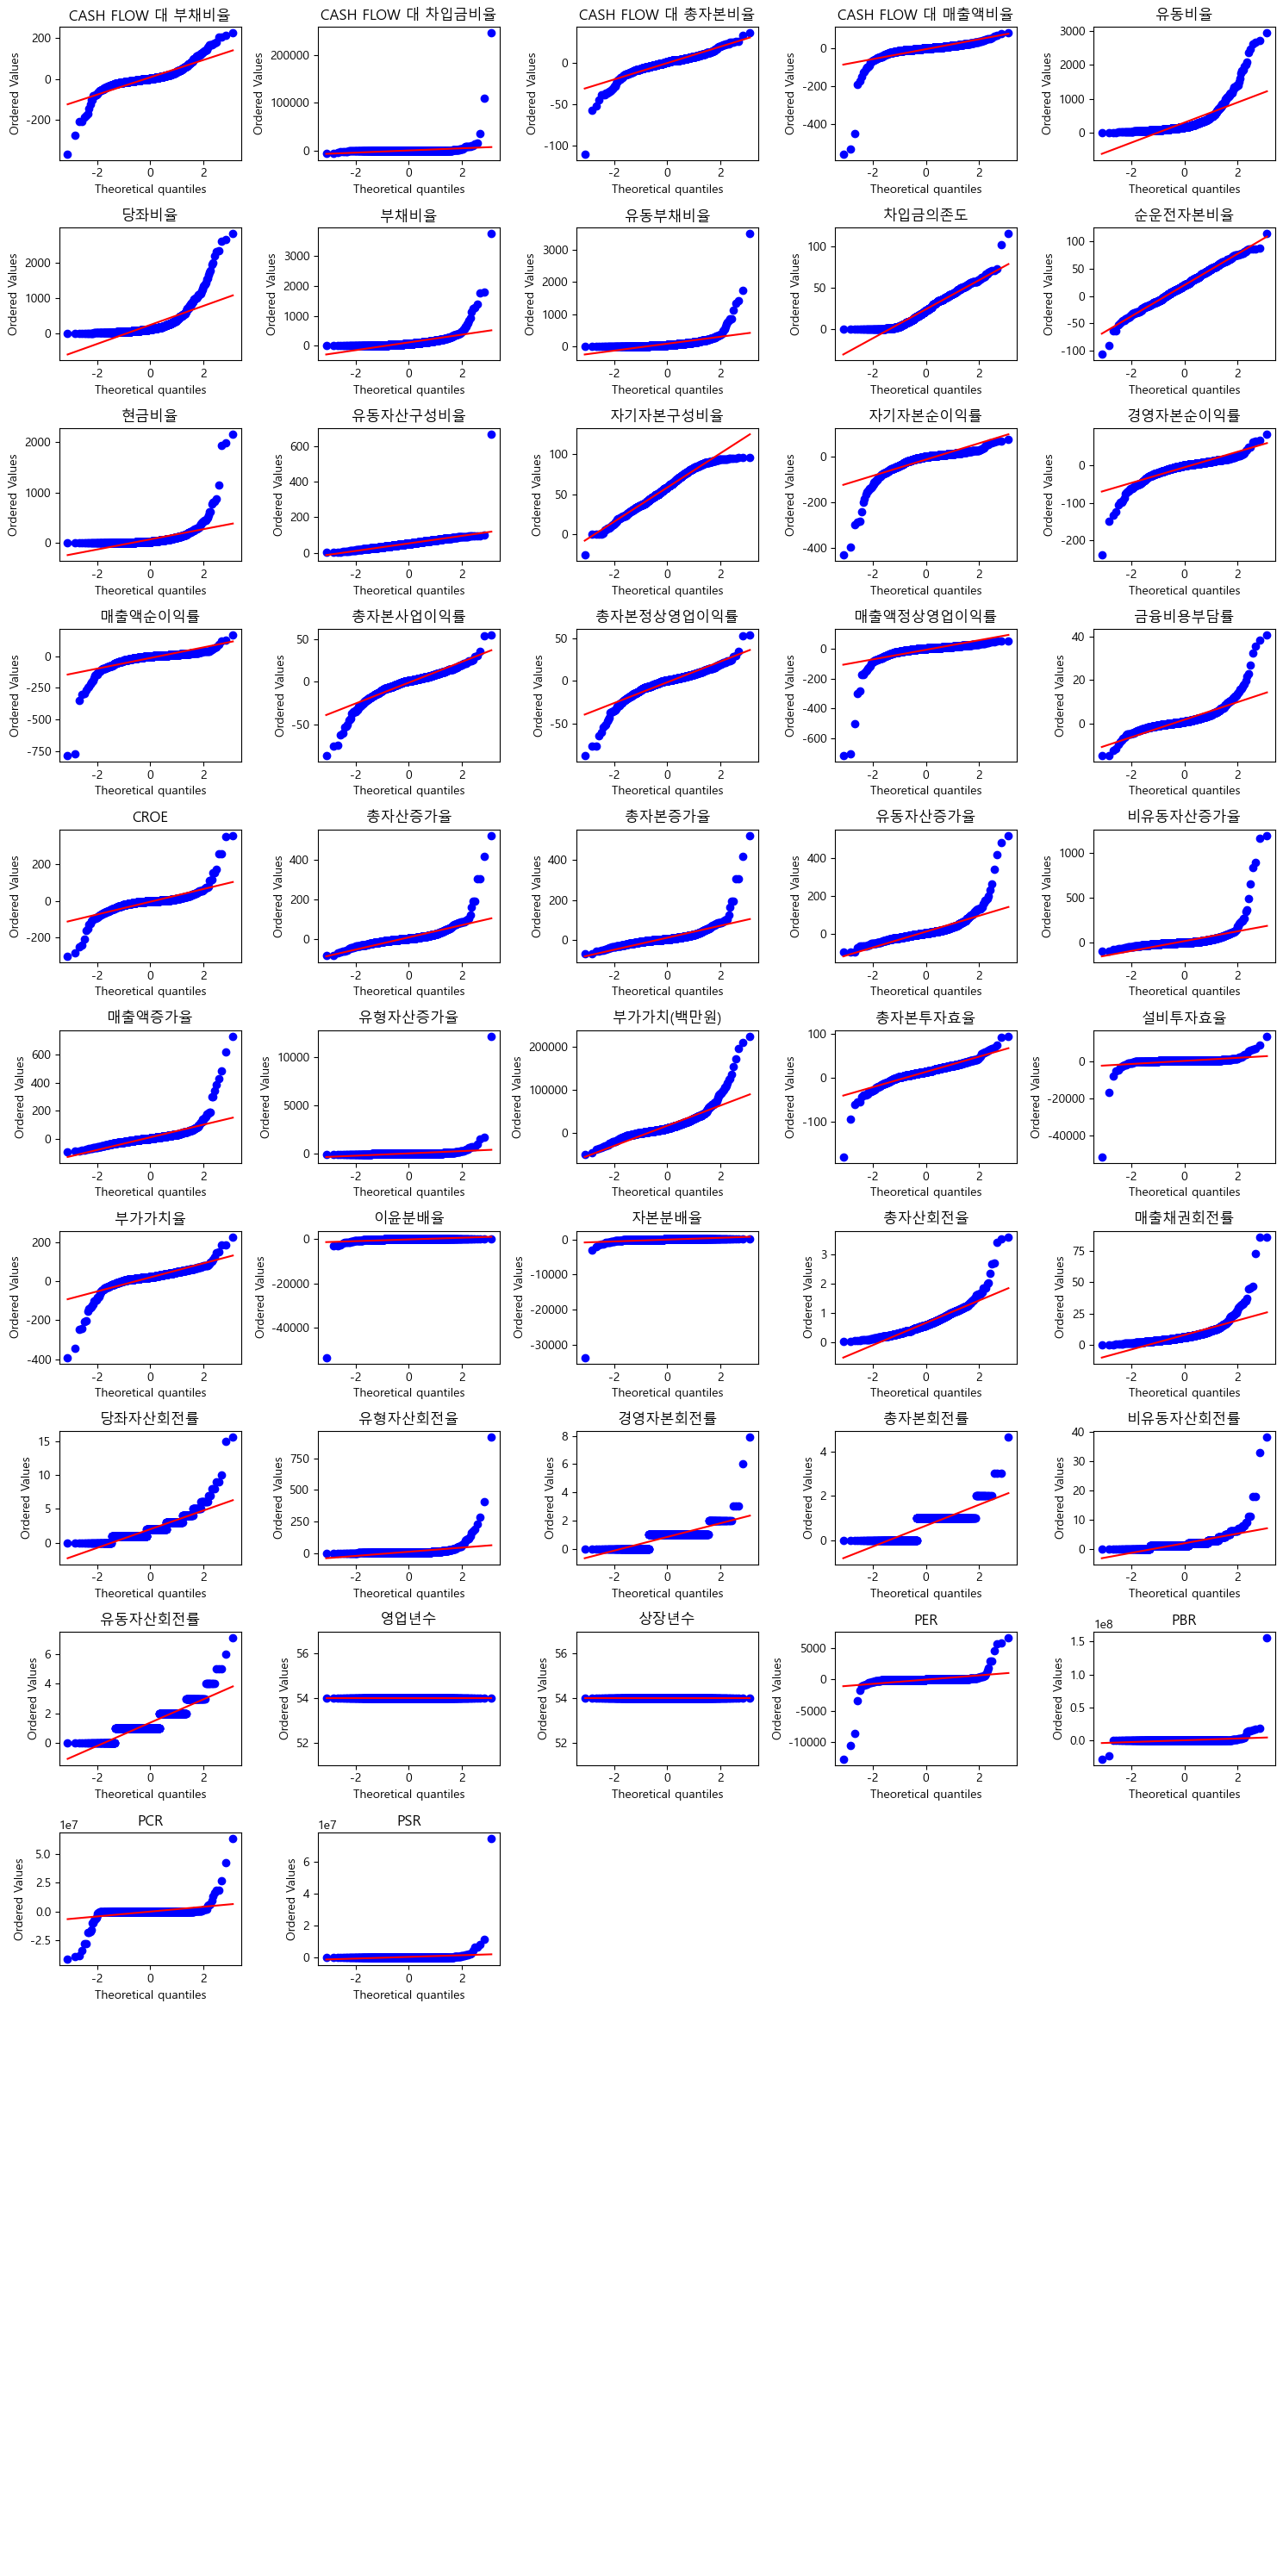

In [67]:
qq_plot(features.drop('부실판단', axis=1))

# 상관계수와 유의성 검정

In [68]:
# 상관 계수와 p-value 계산하는 함수
def correlation_and_pval(df):
    columns = df.columns
    corr_dict = {}
    pval_dict = {}
    
    # 모든 특성 쌍에 대한 상관 계수와 p-value 계산
    for col1, col2 in combinations(columns, 2):
        corr, pval = pearsonr(df[col1], df[col2])
        corr_dict[f"{col1}-{col2}"] = corr
        pval_dict[f"{col1}-{col2}"] = pval
    
    return corr_dict, pval_dict

1현금흐름

<Axes: >

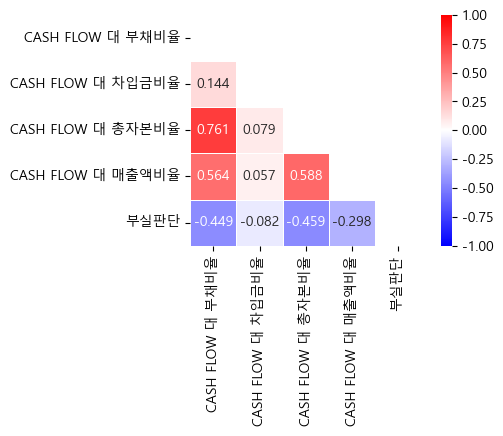

In [69]:
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(cash_ft1.corr(), dtype=bool))
sns.heatmap(cash_ft1.corr(),
            vmax=1,
            vmin=-1,
            # center=0,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask) # 좌하방만 표시

In [70]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(cash_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.144
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.761
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.564
CASH FLOW 대 부채비율-부실판단: -0.449
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.079
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.057
CASH FLOW 대 차입금비율-부실판단: -0.082
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.588
CASH FLOW 대 총자본비율-부실판단: -0.459
CASH FLOW 대 매출액비율-부실판단: -0.298
p-value======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 부채비율-부실판단: 0.000
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.032
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.121
CASH FLOW 대 차입금비율-부실판단: 0.027
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 총자본비율-부실판단: 0.000
CASH FLOW 대 매출액비율-부실판단: 0.000


In [71]:
np.abs(cash_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
CASH FLOW 대 총자본비율   0.459
CASH FLOW 대 부채비율    0.449
CASH FLOW 대 매출액비율   0.298
CASH FLOW 대 차입금비율   0.082
Name: 부실판단, dtype: float64

2안정성

<Axes: >

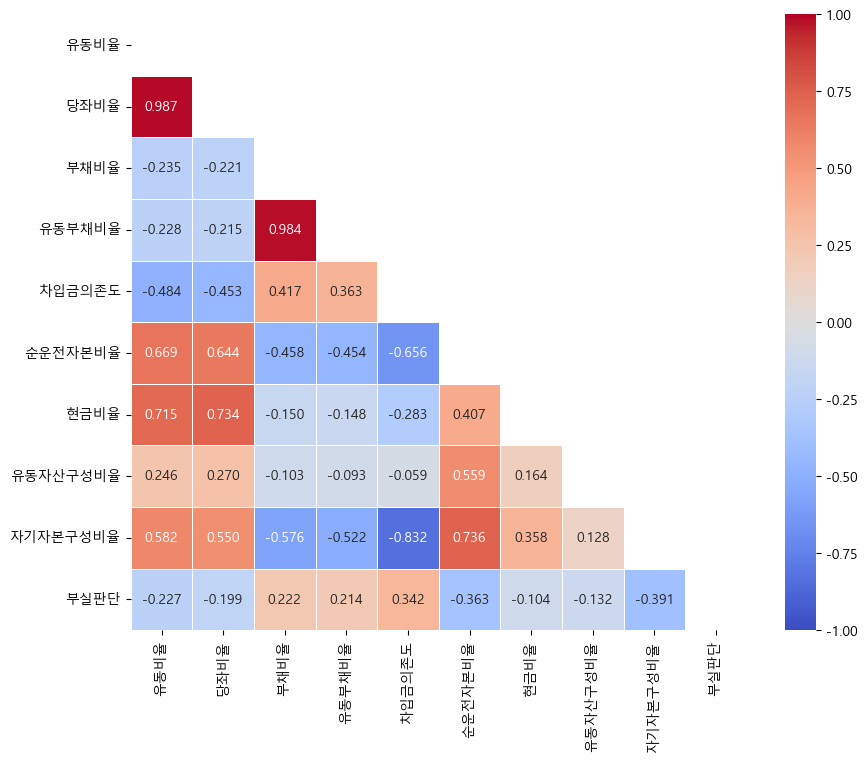

In [72]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

<Axes: >

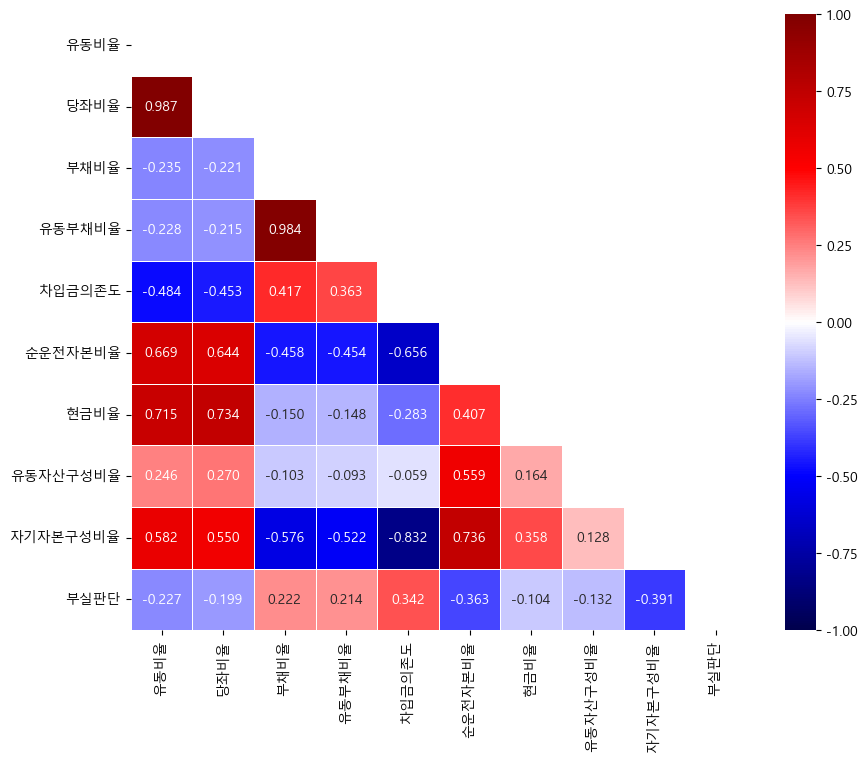

In [73]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='seismic', 
            linewidths=.5, 
            mask = mask)

<Axes: >

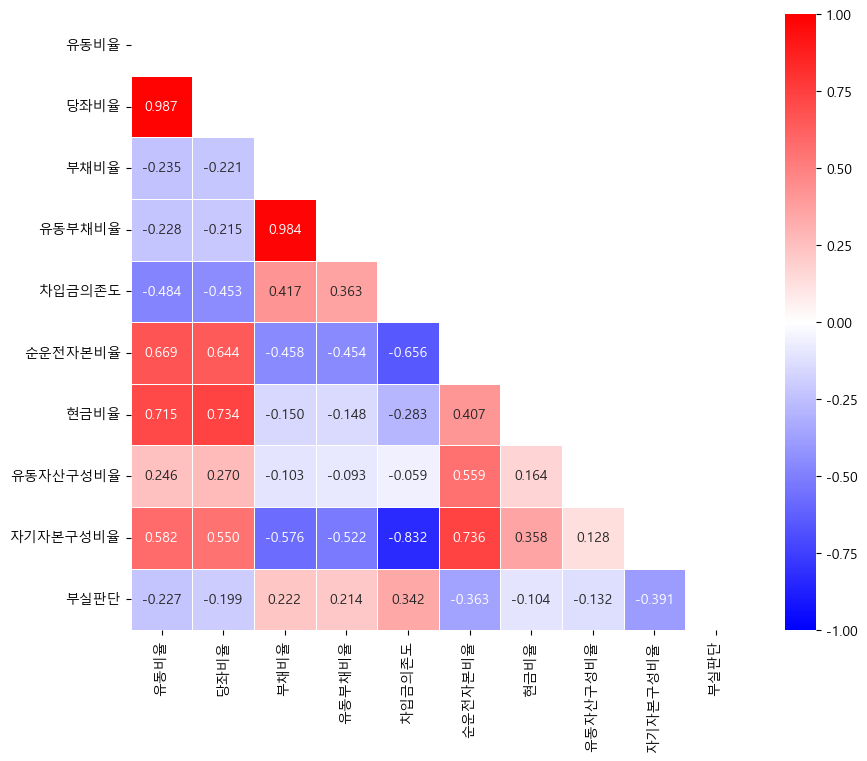

In [74]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [75]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(stability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
유동비율-당좌비율: 0.987
유동비율-부채비율: -0.235
유동비율-유동부채비율: -0.228
유동비율-차입금의존도: -0.484
유동비율-순운전자본비율: 0.669
유동비율-현금비율: 0.715
유동비율-유동자산구성비율: 0.246
유동비율-자기자본구성비율: 0.582
유동비율-부실판단: -0.227
당좌비율-부채비율: -0.221
당좌비율-유동부채비율: -0.215
당좌비율-차입금의존도: -0.453
당좌비율-순운전자본비율: 0.644
당좌비율-현금비율: 0.734
당좌비율-유동자산구성비율: 0.270
당좌비율-자기자본구성비율: 0.550
당좌비율-부실판단: -0.199
부채비율-유동부채비율: 0.984
부채비율-차입금의존도: 0.417
부채비율-순운전자본비율: -0.458
부채비율-현금비율: -0.150
부채비율-유동자산구성비율: -0.103
부채비율-자기자본구성비율: -0.576
부채비율-부실판단: 0.222
유동부채비율-차입금의존도: 0.363
유동부채비율-순운전자본비율: -0.454
유동부채비율-현금비율: -0.148
유동부채비율-유동자산구성비율: -0.093
유동부채비율-자기자본구성비율: -0.522
유동부채비율-부실판단: 0.214
차입금의존도-순운전자본비율: -0.656
차입금의존도-현금비율: -0.283
차입금의존도-유동자산구성비율: -0.059
차입금의존도-자기자본구성비율: -0.832
차입금의존도-부실판단: 0.342
순운전자본비율-현금비율: 0.407
순운전자본비율-유동자산구성비율: 0.559
순운전자본비율-자기자본구성비율: 0.736
순운전자본비율-부실판단: -0.363
현금비율-유동자산구성비율: 0.164
현금비율-자기자본구성비율: 0.358
현금비율-부실판단: -0.104
유동자산구성비율-자기자본구성비율: 0.128
유동자산구성비율-부실판단: -0.132
자기자본구성비율-부실판단: -0.391
p-value======================
유동비율-당좌비율: 0.000
유

In [76]:
np.abs(stability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
자기자본구성비율   0.391
순운전자본비율    0.363
차입금의존도     0.342
유동비율       0.227
부채비율       0.222
유동부채비율     0.214
당좌비율       0.199
유동자산구성비율   0.132
현금비율       0.104
Name: 부실판단, dtype: float64

3수익성

<Axes: >

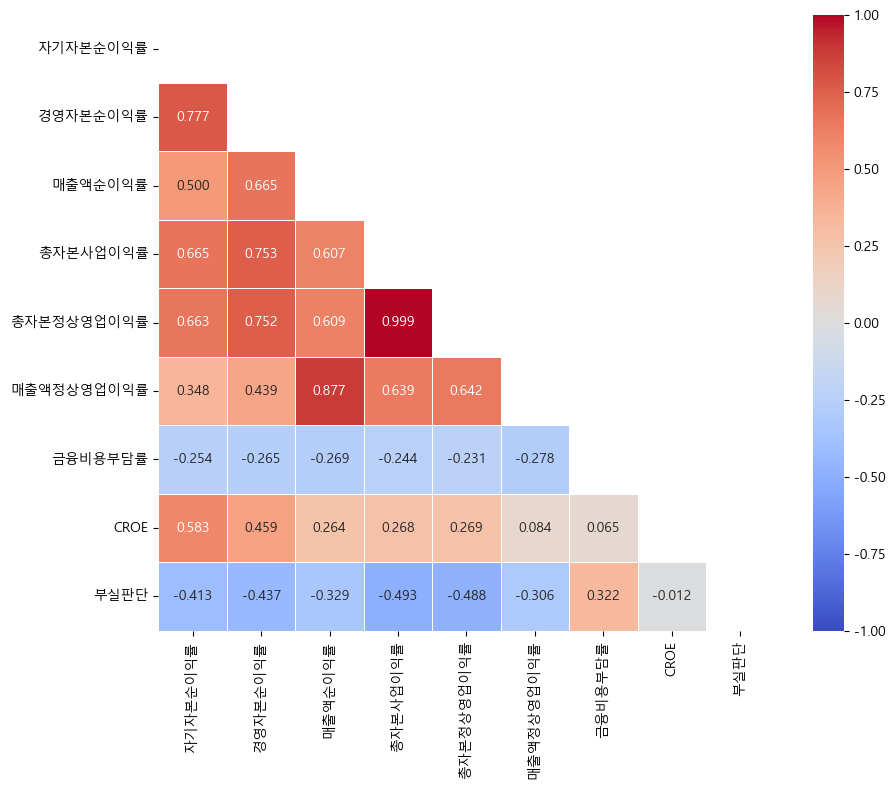

In [77]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(profitability_ft1.corr(), dtype=bool))
sns.heatmap(profitability_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [78]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(profitability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
자기자본순이익률-경영자본순이익률: 0.777
자기자본순이익률-매출액순이익률: 0.500
자기자본순이익률-총자본사업이익률: 0.665
자기자본순이익률-총자본정상영업이익률: 0.663
자기자본순이익률-매출액정상영업이익률: 0.348
자기자본순이익률-금융비용부담률: -0.254
자기자본순이익률-CROE: 0.583
자기자본순이익률-부실판단: -0.413
경영자본순이익률-매출액순이익률: 0.665
경영자본순이익률-총자본사업이익률: 0.753
경영자본순이익률-총자본정상영업이익률: 0.752
경영자본순이익률-매출액정상영업이익률: 0.439
경영자본순이익률-금융비용부담률: -0.265
경영자본순이익률-CROE: 0.459
경영자본순이익률-부실판단: -0.437
매출액순이익률-총자본사업이익률: 0.607
매출액순이익률-총자본정상영업이익률: 0.609
매출액순이익률-매출액정상영업이익률: 0.877
매출액순이익률-금융비용부담률: -0.269
매출액순이익률-CROE: 0.264
매출액순이익률-부실판단: -0.329
총자본사업이익률-총자본정상영업이익률: 0.999
총자본사업이익률-매출액정상영업이익률: 0.639
총자본사업이익률-금융비용부담률: -0.244
총자본사업이익률-CROE: 0.268
총자본사업이익률-부실판단: -0.493
총자본정상영업이익률-매출액정상영업이익률: 0.642
총자본정상영업이익률-금융비용부담률: -0.231
총자본정상영업이익률-CROE: 0.269
총자본정상영업이익률-부실판단: -0.488
매출액정상영업이익률-금융비용부담률: -0.278
매출액정상영업이익률-CROE: 0.084
매출액정상영업이익률-부실판단: -0.306
금융비용부담률-CROE: 0.065
금융비용부담률-부실판단: 0.322
CROE-부실판단: -0.012
p-value======================
자기자본순이익률-경영자본순이익률: 0.000
자기자본순이익률-매출액순이익률: 0.000
자기자본순이익률-총자본사업이익률: 0.000
자기자

In [79]:
np.abs(profitability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단         1.000
총자본사업이익률     0.493
총자본정상영업이익률   0.488
경영자본순이익률     0.437
자기자본순이익률     0.413
매출액순이익률      0.329
금융비용부담률      0.322
매출액정상영업이익률   0.306
CROE         0.012
Name: 부실판단, dtype: float64

4유동성

<Axes: >

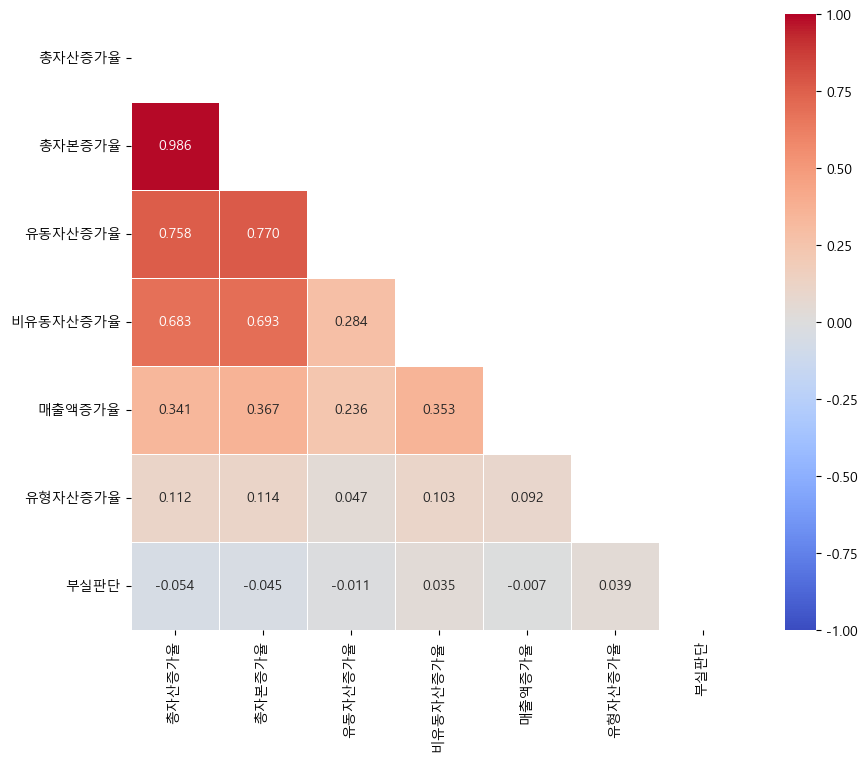

In [80]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(growth_ft1.corr(), dtype=bool))
sns.heatmap(growth_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [81]:
growth_ft1.loc[growth_ft1[growth_ft1['총자산증가율'] == np.inf].index]

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율,부실판단
회사명,,,,,,,


In [82]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(growth_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산증가율-총자본증가율: 0.986
총자산증가율-유동자산증가율: 0.758
총자산증가율-비유동자산증가율: 0.683
총자산증가율-매출액증가율: 0.341
총자산증가율-유형자산증가율: 0.112
총자산증가율-부실판단: -0.054
총자본증가율-유동자산증가율: 0.770
총자본증가율-비유동자산증가율: 0.693
총자본증가율-매출액증가율: 0.367
총자본증가율-유형자산증가율: 0.114
총자본증가율-부실판단: -0.045
유동자산증가율-비유동자산증가율: 0.284
유동자산증가율-매출액증가율: 0.236
유동자산증가율-유형자산증가율: 0.047
유동자산증가율-부실판단: -0.011
비유동자산증가율-매출액증가율: 0.353
비유동자산증가율-유형자산증가율: 0.103
비유동자산증가율-부실판단: 0.035
매출액증가율-유형자산증가율: 0.092
매출액증가율-부실판단: -0.007
유형자산증가율-부실판단: 0.039
p-value======================
총자산증가율-총자본증가율: 0.000
총자산증가율-유동자산증가율: 0.000
총자산증가율-비유동자산증가율: 0.000
총자산증가율-매출액증가율: 0.000
총자산증가율-유형자산증가율: 0.002
총자산증가율-부실판단: 0.141
총자본증가율-유동자산증가율: 0.000
총자본증가율-비유동자산증가율: 0.000
총자본증가율-매출액증가율: 0.000
총자본증가율-유형자산증가율: 0.002
총자본증가율-부실판단: 0.220
유동자산증가율-비유동자산증가율: 0.000
유동자산증가율-매출액증가율: 0.000
유동자산증가율-유형자산증가율: 0.206
유동자산증가율-부실판단: 0.757
비유동자산증가율-매출액증가율: 0.000
비유동자산증가율-유형자산증가율: 0.005
비유동자산증가율-부실판단: 0.342
매출액증가율-유형자산증가율: 0.013
매출액증가율-부실판단: 0.841
유형자산증가율-부실판단: 0.287


In [83]:
np.abs(growth_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자산증가율     0.054
총자본증가율     0.045
유형자산증가율    0.039
비유동자산증가율   0.035
유동자산증가율    0.011
매출액증가율     0.007
Name: 부실판단, dtype: float64

5생산성

<Axes: >

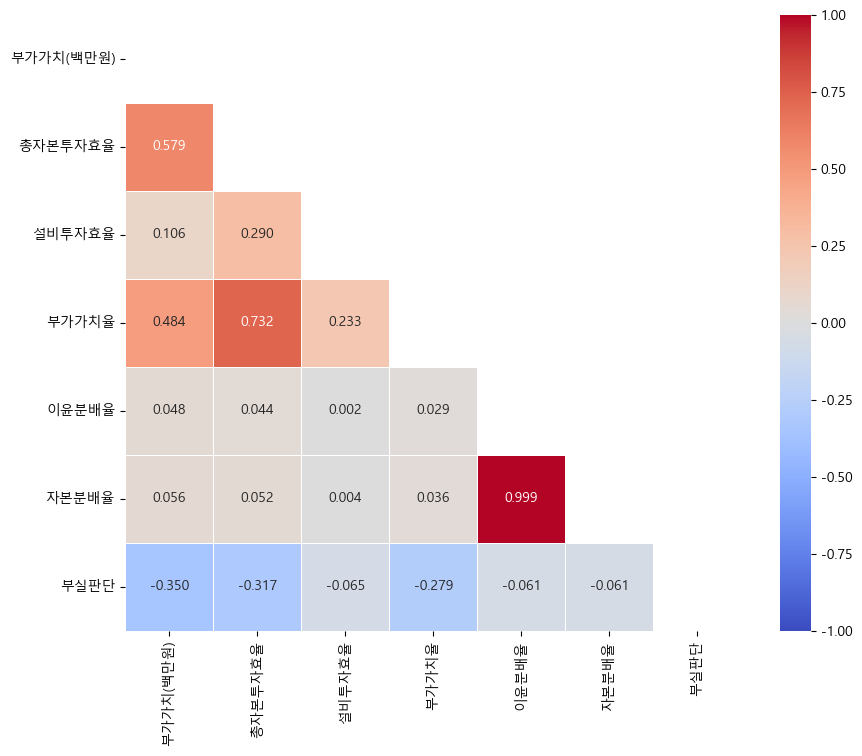

In [84]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(productivity_ft1.corr(), dtype=bool))
sns.heatmap(productivity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [85]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(productivity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
부가가치(백만원)-총자본투자효율: 0.579
부가가치(백만원)-설비투자효율: 0.106
부가가치(백만원)-부가가치율: 0.484
부가가치(백만원)-이윤분배율: 0.048
부가가치(백만원)-자본분배율: 0.056
부가가치(백만원)-부실판단: -0.350
총자본투자효율-설비투자효율: 0.290
총자본투자효율-부가가치율: 0.732
총자본투자효율-이윤분배율: 0.044
총자본투자효율-자본분배율: 0.052
총자본투자효율-부실판단: -0.317
설비투자효율-부가가치율: 0.233
설비투자효율-이윤분배율: 0.002
설비투자효율-자본분배율: 0.004
설비투자효율-부실판단: -0.065
부가가치율-이윤분배율: 0.029
부가가치율-자본분배율: 0.036
부가가치율-부실판단: -0.279
이윤분배율-자본분배율: 0.999
이윤분배율-부실판단: -0.061
자본분배율-부실판단: -0.061
p-value======================
부가가치(백만원)-총자본투자효율: 0.000
부가가치(백만원)-설비투자효율: 0.004
부가가치(백만원)-부가가치율: 0.000
부가가치(백만원)-이윤분배율: 0.192
부가가치(백만원)-자본분배율: 0.133
부가가치(백만원)-부실판단: 0.000
총자본투자효율-설비투자효율: 0.000
총자본투자효율-부가가치율: 0.000
총자본투자효율-이윤분배율: 0.230
총자본투자효율-자본분배율: 0.158
총자본투자효율-부실판단: 0.000
설비투자효율-부가가치율: 0.000
설비투자효율-이윤분배율: 0.959
설비투자효율-자본분배율: 0.909
설비투자효율-부실판단: 0.077
부가가치율-이윤분배율: 0.436
부가가치율-자본분배율: 0.332
부가가치율-부실판단: 0.000
이윤분배율-자본분배율: 0.000
이윤분배율-부실판단: 0.099
자본분배율-부실판단: 0.099


In [86]:
np.abs(productivity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000
부가가치(백만원)   0.350
총자본투자효율     0.317
부가가치율       0.279
설비투자효율      0.065
이윤분배율       0.061
자본분배율       0.061
Name: 부실판단, dtype: float64

6활동성

<Axes: >

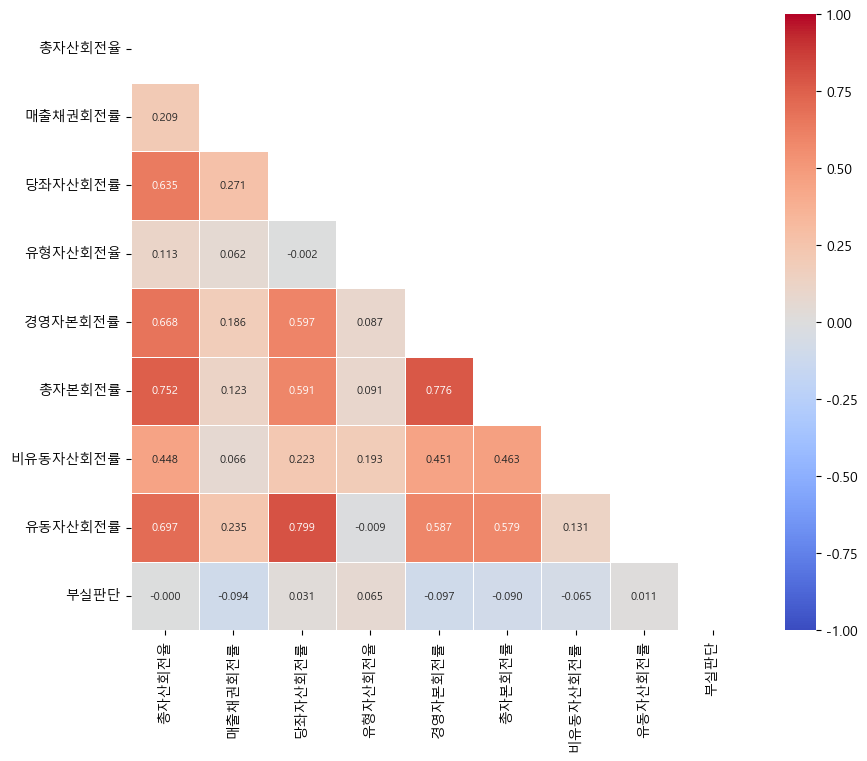

In [87]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(activity_ft1.corr(), dtype=bool))
sns.heatmap(activity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [88]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(activity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산회전율-매출채권회전률: 0.209
총자산회전율-당좌자산회전률: 0.635
총자산회전율-유형자산회전율: 0.113
총자산회전율-경영자본회전률: 0.668
총자산회전율-총자본회전률: 0.752
총자산회전율-비유동자산회전률: 0.448
총자산회전율-유동자산회전률: 0.697
총자산회전율-부실판단: -0.000
매출채권회전률-당좌자산회전률: 0.271
매출채권회전률-유형자산회전율: 0.062
매출채권회전률-경영자본회전률: 0.186
매출채권회전률-총자본회전률: 0.123
매출채권회전률-비유동자산회전률: 0.066
매출채권회전률-유동자산회전률: 0.235
매출채권회전률-부실판단: -0.094
당좌자산회전률-유형자산회전율: -0.002
당좌자산회전률-경영자본회전률: 0.597
당좌자산회전률-총자본회전률: 0.591
당좌자산회전률-비유동자산회전률: 0.223
당좌자산회전률-유동자산회전률: 0.799
당좌자산회전률-부실판단: 0.031
유형자산회전율-경영자본회전률: 0.087
유형자산회전율-총자본회전률: 0.091
유형자산회전율-비유동자산회전률: 0.193
유형자산회전율-유동자산회전률: -0.009
유형자산회전율-부실판단: 0.065
경영자본회전률-총자본회전률: 0.776
경영자본회전률-비유동자산회전률: 0.451
경영자본회전률-유동자산회전률: 0.587
경영자본회전률-부실판단: -0.097
총자본회전률-비유동자산회전률: 0.463
총자본회전률-유동자산회전률: 0.579
총자본회전률-부실판단: -0.090
비유동자산회전률-유동자산회전률: 0.131
비유동자산회전률-부실판단: -0.065
유동자산회전률-부실판단: 0.011
p-value======================
총자산회전율-매출채권회전률: 0.000
총자산회전율-당좌자산회전률: 0.000
총자산회전율-유형자산회전율: 0.002
총자산회전율-경영자본회전률: 0.000
총자산회전율-총자본회전률: 0.000
총자산회전율-비유동자산회전률: 0.000
총자산회전율-

In [89]:
np.abs(activity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
경영자본회전률    0.097
매출채권회전률    0.094
총자본회전률     0.090
비유동자산회전률   0.065
유형자산회전율    0.065
당좌자산회전률    0.031
유동자산회전률    0.011
총자산회전율     0.000
Name: 부실판단, dtype: float64

7시장지표 및 기타

<Axes: >

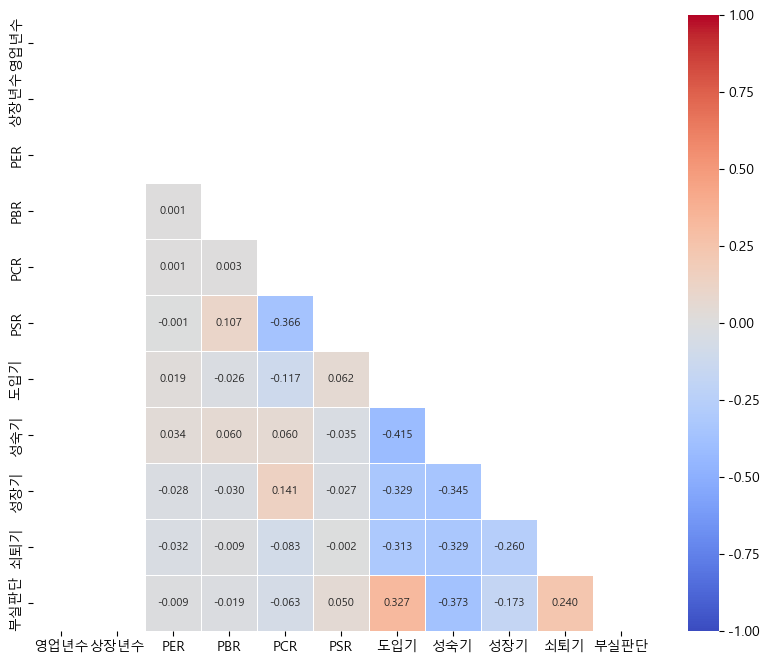

In [90]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(etc_ft1.corr(), dtype=bool))
sns.heatmap(etc_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [91]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수-성장기: nan
영업년수-쇠퇴기: nan
영업년수-부실판단: nan
상장년수-PER: nan
상장년수-PBR: nan
상장년수-PCR: nan
상장년수-PSR: nan
상장년수-도입기: nan
상장년수-성숙기: nan
상장년수-성장기: nan
상장년수-쇠퇴기: nan
상장년수-부실판단: nan
PER-PBR: 0.001
PER-PCR: 0.001
PER-PSR: -0.001
PER-도입기: 0.019
PER-성숙기: 0.034
PER-성장기: -0.028
PER-쇠퇴기: -0.032
PER-부실판단: -0.009
PBR-PCR: 0.003
PBR-PSR: 0.107
PBR-도입기: -0.026
PBR-성숙기: 0.060
PBR-성장기: -0.030
PBR-쇠퇴기: -0.009
PBR-부실판단: -0.019
PCR-PSR: -0.366
PCR-도입기: -0.117
PCR-성숙기: 0.060
PCR-성장기: 0.141
PCR-쇠퇴기: -0.083
PCR-부실판단: -0.063
PSR-도입기: 0.062
PSR-성숙기: -0.035
PSR-성장기: -0.027
PSR-쇠퇴기: -0.002
PSR-부실판단: 0.050
도입기-성숙기: -0.415
도입기-성장기: -0.329
도입기-쇠퇴기: -0.313
도입기-부실판단: 0.327
성숙기-성장기: -0.345
성숙기-쇠퇴기: -0.329
성숙기-부실판단: -0.373
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.173
쇠퇴기-부실판단: 0.240
p-value======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년

In [92]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년수-성장기: nan
영업년수-쇠퇴기: nan
영업년수-부실판단: nan
상장년수-PER: nan
상장년수-PBR: nan
상장년수-PCR: nan
상장년수-PSR: nan
상장년수-도입기: nan
상장년수-성숙기: nan
상장년수-성장기: nan
상장년수-쇠퇴기: nan
상장년수-부실판단: nan
PER-PBR: 0.001
PER-PCR: 0.001
PER-PSR: -0.001
PER-도입기: 0.019
PER-성숙기: 0.034
PER-성장기: -0.028
PER-쇠퇴기: -0.032
PER-부실판단: -0.009
PBR-PCR: 0.003
PBR-PSR: 0.107
PBR-도입기: -0.026
PBR-성숙기: 0.060
PBR-성장기: -0.030
PBR-쇠퇴기: -0.009
PBR-부실판단: -0.019
PCR-PSR: -0.366
PCR-도입기: -0.117
PCR-성숙기: 0.060
PCR-성장기: 0.141
PCR-쇠퇴기: -0.083
PCR-부실판단: -0.063
PSR-도입기: 0.062
PSR-성숙기: -0.035
PSR-성장기: -0.027
PSR-쇠퇴기: -0.002
PSR-부실판단: 0.050
도입기-성숙기: -0.415
도입기-성장기: -0.329
도입기-쇠퇴기: -0.313
도입기-부실판단: 0.327
성숙기-성장기: -0.345
성숙기-쇠퇴기: -0.329
성숙기-부실판단: -0.373
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.173
쇠퇴기-부실판단: 0.240
p-value======================
영업년수-상장년수: nan
영업년수-PER: nan
영업년수-PBR: nan
영업년수-PCR: nan
영업년수-PSR: nan
영업년수-도입기: nan
영업년수-성숙기: nan
영업년

# 정규성 검정

In [91]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, anderson, ks_2samp

def normality_tests_for_dataframe(df, distribution='normal'):
    """
    데이터 프레임의 각 컬럼에 대한 정규성 검정을 수행하는 함수

    Parameters:
    - df: 정규성을 검정할 데이터 프레임
    - distribution: 비교할 분포의 종류 ('normal' 또는 'custom')
    """
    for column in df.select_dtypes(include=[np.number]).columns:
        print(f"\n=== {column} ===")
        data = df[column]

        if distribution == 'normal':
            # 정규 분포로 가정한 경우
            normal_dist = np.random.normal(size=len(data))
        elif distribution == 'custom':
            # 사용자가 지정한 분포로 가정한 경우
            # 여기에서는 예시로 표준 정규분포 사용
            normal_dist = np.random.normal(size=len(data))
        else:
            raise ValueError("Invalid distribution. Choose 'normal' or 'custom'.")

        # Shapiro-Wilk Test
        stat_sw, p_value_sw = shapiro(data)
        print(f'Shapiro-Wilk 통계량: {stat_sw}, p-value: {p_value_sw}')

        # Anderson-Darling Test
        result_ad = anderson(data)
        print(f'Anderson-Darling 통계량: {result_ad.statistic}')

        for i in range(len(result_ad.critical_values)):
            sl, cv = result_ad.significance_level[i], result_ad.critical_values[i]
            if result_ad.statistic < cv:
                print(f'데이터는 {sl * 100:.1f}% 신뢰수준에서 정규분포를 따를 수 있습니다.')
            else:
                print(f'데이터는 {sl * 100:.1f}% 신뢰수준에서 정규분포를 따르지 않습니다.')

        # Kolmogorov-Smirnov Test
        stat_ks, p_value_ks = ks_2samp(data, normal_dist)
        print(f'KS 통계량: {stat_ks}, p-value: {p_value_ks}')

        # p-value가 유의수준 (일반적으로 0.05) 보다 작으면 정규성 가정 기각
        if p_value_sw < 0.001 or any(result_ad.statistic > result_ad.critical_values):
            print('데이터는 정규분포를 따르지 않습니다.')
        else:
            print('데이터는 정규분포를 따를 수 있습니다.')

# 예시 데이터 프레임
data = {'column1': [1, 2, 2, 3, 3, 3, 4, 4, 5],
        'column2': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 정규성 검정 수행 (기본적으로는 표준 정규분포와 비교)
normality_tests_for_dataframe(df)


=== column1 ===
Shapiro-Wilk 통계량: 0.9630724191665649, p-value: 0.8298695683479309
Anderson-Darling 통계량: 0.2609858431763481
데이터는 1500.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
KS 통계량: 0.8888888888888888, p-value: 0.0007404360345536814
데이터는 정규분포를 따를 수 있습니다.

=== column2 ===
Shapiro-Wilk 통계량: 0.9722883105278015, p-value: 0.9135605096817017
Anderson-Darling 통계량: 0.13676646631470213
데이터는 1500.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따를 수 있습니다.
KS 통계량: 1.0, p-value: 4.11353352529823e-05
데이터는 정규분포를 따를 수 있습니다.


1현금흐름

In [92]:
normality_tests_for_dataframe(cash_ft1.drop('부실판단', axis=1))


=== CASH FLOW 대 부채비율 ===
Shapiro-Wilk 통계량: 0.7305698990821838, p-value: 1.0081023389604614e-32
Anderson-Darling 통계량: 49.40695991983455
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.4911080711354309, p-value: 2.351147642964414e-80
데이터는 정규분포를 따르지 않습니다.

=== CASH FLOW 대 차입금비율 ===
Shapiro-Wilk 통계량: 0.030785739421844482, p-value: 0.0
Anderson-Darling 통계량: 266.1244738830992
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.493844049247606, p-value: 2.723637860389573e-81
데이터는 정규분포를 따르지 않습니다.

=== CASH FLOW 대 총자본비율 ===
Shapiro-Wilk 통계량: 0.601537823677063, p-value: 7.033249275021289e-38
Anderson-Darling 통계량: 38.90565193041539
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를

2안정성

In [93]:
normality_tests_for_dataframe(stability_ft1.drop('부실판단', axis=1))


=== 유동비율 ===
Shapiro-Wilk 통계량: 0.6042473316192627, p-value: 8.718607193126933e-38
Anderson-Darling 통계량: 85.9915817052522
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 1.0, p-value: 0.0
데이터는 정규분포를 따르지 않습니다.

=== 당좌비율 ===
Shapiro-Wilk 통계량: 0.5752803683280945, p-value: 9.306233296350759e-39
Anderson-Darling 통계량: 93.77296983178553
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.9972640218878249, p-value: 0.0
데이터는 정규분포를 따르지 않습니다.

=== 부채비율 ===
Shapiro-Wilk 통계량: 0.17682069540023804, p-value: 0.0
Anderson-Darling 통계량: 156.94666581496585
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 

3수익성

In [94]:
normality_tests_for_dataframe(profitability_ft1.drop('부실판단', axis=1))


=== 자기자본순이익률 ===
Shapiro-Wilk 통계량: 0.6461191773414612, p-value: 2.833892026359911e-36
Anderson-Darling 통계량: 58.06100198889101
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.4692202462380301, p-value: 4.3340988374779365e-73
데이터는 정규분포를 따르지 않습니다.

=== 경영자본순이익률 ===
Shapiro-Wilk 통계량: 0.6145682334899902, p-value: 1.9981572186626322e-37
Anderson-Darling 통계량: 47.91314235820846
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.46238030095759236, p-value: 6.714308087654415e-71
데이터는 정규분포를 따르지 않습니다.

=== 매출액순이익률 ===
Shapiro-Wilk 통계량: 0.505745530128479, p-value: 6.913446103592918e-41
Anderson-Darling 통계량: 83.84245027730367
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니

4유동성

In [95]:
normality_tests_for_dataframe(growth_ft1.drop('부실판단', axis=1))


=== 총자산증가율 ===
Shapiro-Wilk 통계량: 0.4938269257545471, p-value: 3.1602082967453275e-41
Anderson-Darling 통계량: 70.96048664113289
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.518467852257182, p-value: 5.304680898188472e-90
데이터는 정규분포를 따르지 않습니다.

=== 총자본증가율 ===
Shapiro-Wilk 통계량: 0.48090291023254395, p-value: 1.3752343128883755e-41
Anderson-Darling 통계량: 73.57255548554463
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.5020519835841313, p-value: 3.8814514704355705e-84
데이터는 정규분포를 따르지 않습니다.

=== 유동자산증가율 ===
Shapiro-Wilk 통계량: 0.6602731943130493, p-value: 9.913293122355676e-36
Anderson-Darling 통계량: 48.45042679898006
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.


5생산성

In [96]:
normality_tests_for_dataframe(productivity_ft1.drop('부실판단', axis=1))


=== 부가가치(백만원) ===
Shapiro-Wilk 통계량: 0.7575329542160034, p-value: 2.1157765138246982e-31
Anderson-Darling 통계량: 38.6157721829552
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.8563611491108071, p-value: 3.1569369351629934e-276
데이터는 정규분포를 따르지 않습니다.

=== 총자본투자효율 ===
Shapiro-Wilk 통계량: 0.6243584156036377, p-value: 4.462555359206435e-37
Anderson-Darling 통계량: 35.19336084752035
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.8153214774281806, p-value: 8.721283702398946e-245
데이터는 정규분포를 따르지 않습니다.

=== 설비투자효율 ===
Shapiro-Wilk 통계량: 0.05753093957901001, p-value: 0.0
Anderson-Darling 통계량: 242.13889779292367
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신

6활동성

In [97]:
normality_tests_for_dataframe(activity_ft1.drop('부실판단', axis=1))


=== 총자산회전율 ===
Shapiro-Wilk 통계량: 0.8483909368515015, p-value: 7.324802767677674e-26
Anderson-Darling 통계량: 15.434416370161443
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.5348837209302325, p-value: 4.232136405397024e-96
데이터는 정규분포를 따르지 않습니다.

=== 매출채권회전률 ===
Shapiro-Wilk 통계량: 0.5919475555419922, p-value: 3.3191287148053264e-38
Anderson-Darling 통계량: 64.03148196461882
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.9507523939808481, p-value: 0.0
데이터는 정규분포를 따르지 않습니다.

=== 당좌자산회전률 ===
Shapiro-Wilk 통계량: 0.7589297294616699, p-value: 2.495016146979076e-31
Anderson-Darling 통계량: 40.06500183488288
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서

7시장지표 및 기타

In [98]:
normality_tests_for_dataframe(etc_ft1.drop('부실판단', axis=1))


=== 영업년수 ===
Shapiro-Wilk 통계량: 1.0, p-value: 1.0
Anderson-Darling 통계량: nan
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 1.0, p-value: 0.0
데이터는 정규분포를 따를 수 있습니다.

=== 상장년수 ===
Shapiro-Wilk 통계량: 1.0, p-value: 1.0
Anderson-Darling 통계량: nan
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 1.0, p-value: 0.0
데이터는 정규분포를 따를 수 있습니다.

=== PER ===
Shapiro-Wilk 통계량: 0.14400851726531982, p-value: 0.0
Anderson-Darling 통계량: 228.3018532706899
데이터는 1500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 1000.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 500.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 250.0% 신뢰수준에서 정규분포를 따르지 않습니다.
데이터는 100.0% 신뢰수준에서 정규분포를 따르지 않습니다.
KS 통계량: 0.46238030095759236, p-value: 6.714308087654415e-71
데이터는 정규분포를 따르지 않습니다.

=== PBR ===
Shapiro-Wilk 통계량: 0.02